# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 
Shailja Somani\
ADS 509 Summer 2024\
May 18, 2024


This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [12]:
# Install the emoji package as I do not already have it
!pip install emoji
# Download stopwords from nltk as I have not already done that & the next cell throws an error if I do not
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shailjasomani/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [68]:
# Additional imports
import matplotlib.pyplot as plt

In [2]:
# change `data_location` to the location of the folder on your machine - done.
data_location = "/users/shailjasomani/Documents/USD_MS_ADS/ADS_509/M1_Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [19]:
def descriptive_stats(tokens, number_tokens = 5, verbose=True):
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
        
        Note: Changed parameter to number_tokens, not num_tokens, so not overwritten by num of total tokens.
    """

    # Fill in the correct values here - I used the params fed into this function
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens)) # use set to get unique list
    lexical_diversity = num_unique_tokens/num_tokens 
    num_characters = sum(len(i) for i in tokens) # get total num of chars through all tokens
    
    if verbose:        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens - using param fed in again to make the num of most common tokens customizable
        most_common_tokens = Counter(tokens).most_common(number_tokens)
        print(f"The {number_tokens} most common tokens are as follows: {most_common_tokens}.")
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

*Note:* I was not familiar with lexical diversity prior to this assignment. Thus, I used a definition from an article in the American Journal of Speech-Language Pathology, which stated that "one of the most commonly used approaches to measure LD is to use the ratio of unique lexical items divided by the total number of words in a sample" (Fergadiotis, et. al., 2013).\
The full reference for that article is: Fergadiotis, G., Wright, H. H., & West, T. M. (2013, May). *Measuring lexical diversity in narrative discourse of people with aphasia.* American journal of speech-language pathology, 22(2), S397–S408. Retrieved May 18, 2024, from https://doi.org/10.1044/1058-0360(2013/12-0083).

In [26]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The 5 most common tokens are as follows: [('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1)].


Q: Why is it beneficial to use assertion statements in your code? 

A: There are a variety of reasons that it's beneficial to use assertion statements in our code, including the following:
* Check that assumptions you made remain true. For example, if you expect a parameter fed in to be a string, but it's an int, an assert condition could check if it's a string and assert an error if not (Ramos, n.d.). 
* Assertion statements also make debugging easier by triggering alarms if there is a bug and explaining where and what that bug is, based on how specific your assertion statement may be (Ramos, n.d.).
* If you have multiple assertion statements throughout your code that verify assumptions are being met, the code is progressing as expected, etc, if there is a bug, you may be able to easier pinpoint it by knowing where the last successful checkpoint was by seeing what the last successful assertion statement was (Ramos, n.d.). 
* Assertion statements can be disabled as a group, so they can be easily disabled in a Prod environment without removing them from your code altogether. This allows them to still remain in your dev code for future testing, but not show up in your prod environment (Jones, n.d.).

References\
Jones, D. (n.d.) *Disabling Assertions in Production.* RealPython. Retrieved May 18, 2024, from https://realpython.com/lessons/disable-python-assertions/#transcript. \
Ramos, L.P. (n.d.) *Python's assert: Debug and Test Your Code Like a Pro.* RealPython. Retrieved May 18, 2024, from https://realpython.com/python-assert-statement/#what-are-assertions-good-for. 

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [5]:
# Read in the lyrics data the way the instructions suggest above
# Initialize empty dictionary & path to lyrics data
lyrics_data = {}
lyrics_path = os.path.join(data_location, lyrics_folder)

# Loop through artists in lyrics_path
for artist in os.listdir(lyrics_path):
    artist_path = os.path.join(lyrics_path, artist)
    # Create nested empty dict for the "2nd dimension" of keys, as instructed
    lyrics_data[artist] = {}
    # Loop through all song file names in artist folder 
    for song_file in os.listdir(artist_path):
        song_path = os.path.join(artist_path, song_file)
        with open(song_path, 'r', encoding='utf-8') as file:
            lyrics_data[artist][song_file] = file.read()

In [ ]:
# Check lyrics data, then clear output so not messy, long output in PDF printed
lyrics_data

In [7]:
# Read in the twitter data
# Initialize empty dictionary & path to Twitter data
twitter_data = {}
twitter_path = os.path.join(data_location, twitter_folder)

# Loop through file names in twitter_path 
for file_name in os.listdir(twitter_path):
    # Keep only files that end with "_followers_data.txt" as they're the only one with the description col
    if file_name.endswith("_followers_data.txt"):
        # Extract artist_name from file name
        artist_name = file_name.replace("_followers_data.txt", "")
        # Get file path for relevant files (followers data files)
        file_path = os.path.join(twitter_path, file_name)
        
        # Read the file into a pandas DataFrame as tab-separated to get the description col as list
        # Was throwing errors for a few lines, so added to ignore bad lines, but warn us so we're aware which it skipped
        follower_data_df = pd.read_csv(file_path, delimiter='\t', error_bad_lines=False, warn_bad_lines=True)
        descriptions = follower_data_df['description'].dropna().tolist()
        # Store follower descriptions as list of strings with artist name as key in dict
        twitter_data[artist_name] = descriptions

/var/folders/rq/tgl8p9x96vl4gjdp366mpjv00000gn/T/ipykernel_69942/3871228178.py:17: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  follower_data_df = pd.read_csv(file_path, delimiter='\t', error_bad_lines=False, warn_bad_lines=True)
/var/folders/rq/tgl8p9x96vl4gjdp366mpjv00000gn/T/ipykernel_69942/3871228178.py:17: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  follower_data_df = pd.read_csv(file_path, delimiter='\t', error_bad_lines=False, warn_bad_lines=True)
b'Skipping line 624: expected 7 fields, saw 12\nSkipping line 17506: expected 7 fields, saw 12\nSkipping line 104621: expected 7 fields, saw 12\n'
b'Skipping line 188924: expected 7 fields, saw 12\n'
b'Skipping line 301600: expected 7 fields, saw 12\n'
b'Skipping line 429936: expected 7 fields, saw 12\nSkipping line 444405: expected 7 fields, saw 

In [ ]:
# Check twitter_data, then clear output so not messy, long output in PDF printed
twitter_data

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [32]:
punctuation = set(punctuation) # speeds up comparison
# Remove # from this, so we can count hashtags later in the Specialty Statistics
punctuation.discard('#')

In [33]:
# Create func to clean & tokenize so can be called for both datasets
def clean_tokenize(text):
    # Remove punctuation chars
    text = ''.join([char for char in text if char not in punctuation])
    # Fold to lowercase - have to do before tokenize so string, not list
    text = text.lower()
    # Split on whitespace
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in sw]
    return tokens

In [34]:
# create your clean lyrics data here
# Initialize new dict for cleaned lyrics data
clean_lyrics_data = {}

# Loop through all artists & songs in original lyrics data dict
for artist, songs in lyrics_data.items():
    # Initialize nested dict 
    clean_lyrics_data[artist] = {}
    for song, lyrics in songs.items():
        clean_lyrics_data[artist][song] = clean_tokenize(lyrics)

In [35]:
# create your clean twitter data here
# Initialize new dict for cleaned twitter data
clean_twitter_data = {}

# Loop through all artists & descriptions in original twitter data dict
for artist, descriptions in twitter_data.items():
    cleaned_descriptions = [clean_tokenize(description) for description in descriptions]
    clean_twitter_data[artist] = cleaned_descriptions

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [36]:
# Create function to flatten token lists, as in the Twitter data
def flatten_token_list(token_metalist):
    '''
    Flattens list of list of tokens - can be nested only once.
    Returns just a flat list of tokens.
    '''
    flat_token_list = []

    for i in token_metalist: 
        if type(i) == list:
            for j in i:
                flat_token_list.append(j)
        else:
            flat_token_list.append(i)

    return flat_token_list

In [37]:
# Create function to flatten token dict of lists, as in Lyrics data
def flatten_lyrics_dict(token_dict, overall_dict, artist):
    '''
    Flattens lyrics dict (nested dict) to flat list of tokens.
    Relies on flatten_token_list() function.
    '''
    
    flat_token_list = []
    for song in token_dict:
        for i in overall_dict.get(artist).get(song):
            flat_token_list.append(i)

    return flat_token_list

In [38]:
# call descriptive_stats here for Cher Twitter data
# Flatten Cher's list of list of tokens, then call descriptive_stats function
cher_twitter_tokens = flatten_token_list(clean_twitter_data.get('cher'))
descriptive_stats(cher_twitter_tokens)

There are 16152479 tokens in the data.
There are 1735914 unique tokens in the data.
There are 96481756 characters in the data.
The lexical diversity is 0.107 in the data.
The 5 most common tokens are as follows: [('love', 213476), ('im', 138990), ('life', 122600), ('music', 86725), ('de', 73273)].


[16152479, 1735914, 0.10747043843858271, 96481756]

In [39]:
# call descriptive_stats here for Robyn Twitter data
# Flatten Robyn's list of list of tokens, then call descriptive_stats function
robyn_twitter_tokens = flatten_token_list(clean_twitter_data.get('robynkonichiwa'))
descriptive_stats(robyn_twitter_tokens)

There are 1538419 tokens in the data.
There are 277006 unique tokens in the data.
There are 9427962 characters in the data.
The lexical diversity is 0.180 in the data.
The 5 most common tokens are as follows: [('music', 14871), ('love', 11621), ('im', 9050), ('och', 7922), ('life', 7358)].


[1538419, 277006, 0.18005887862799405, 9427962]

In [40]:
# call descriptive_stats here for Cher Lyrics data
# Flatten Cher's list of list of tokens, then call descriptive_stats function
cher_lyrics_tokens = flatten_lyrics_dict(clean_lyrics_data.get('cher'), clean_lyrics_data, 'cher')
descriptive_stats(cher_lyrics_tokens, 5)

There are 35916 tokens in the data.
There are 3703 unique tokens in the data.
There are 172634 characters in the data.
The lexical diversity is 0.103 in the data.
The 5 most common tokens are as follows: [('love', 1004), ('im', 513), ('know', 486), ('dont', 440), ('youre', 333)].


[35916, 3703, 0.10310168170174852, 172634]

In [41]:
# call descriptive_stats here for Robyn Lyrics data
# Flatten Robyn's list of list of tokens, then call descriptive_stats function
robyn_lyrics_tokens = flatten_lyrics_dict(clean_lyrics_data.get('robyn'), clean_lyrics_data, 'robyn')
descriptive_stats(robyn_lyrics_tokens, 5)

There are 15227 tokens in the data.
There are 2156 unique tokens in the data.
There are 73787 characters in the data.
The lexical diversity is 0.142 in the data.
The 5 most common tokens are as follows: [('know', 308), ('dont', 301), ('im', 299), ('love', 275), ('got', 251)].


[15227, 2156, 0.14159059565245943, 73787]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: Right now, the Top 5 words for both artists are fairly meaningful words, such as "music", "love", "know", "life", etc. There are still some less meaningful words such as "im" and "och", but I imagine the less meaningful words would have been much higher if we had left in stop words. I think we would have seen many more words like "the", "a", "of", etc that would allow us to understand the themes in the music and Twitter account descriptions much less effectively. 

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I had previously imagined that there would be fairly low lexical diversity overall because artists often sing about the same themes, such as love. Given that they both have a lexical diversity beneath 0.15, I think my hypothesis there was on the right track. In terms of the difference in their lexical diversity, I had no firm prior beliefs, but I am intruiged by the fact that Robyn has significantly fewer total tokens and unique tokens, but higher lexical diversity. Cher's lower lexical diversity may be due to higher lyrical repetition or simply that she has more music, thus more total tokens, thus a higher likelihood of repetition to begin with.


## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [25]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [42]:
# 10 most common emojis for Cher's Twitter descriptions
cher_emojis = [token for token in cher_twitter_tokens if emoji.is_emoji(token)]
Counter(cher_emojis).most_common(10)

[('❤️', 14726),
 ('🏳️\u200d🌈', 14170),
 ('♥', 10227),
 ('❤', 9671),
 ('✨', 8407),
 ('🌈', 5491),
 ('🇺🇸', 3734),
 ('💙', 3707),
 ('💜', 3509),
 ('🌊', 3290)]

In [43]:
# 10 most common emojis for Robyn's Twitter descriptions
robyn_emojis = [token for token in robyn_twitter_tokens if emoji.is_emoji(token)]
Counter(robyn_emojis).most_common(10)

[('🏳️\u200d🌈', 1708),
 ('♥', 1170),
 ('❤️', 991),
 ('✨', 755),
 ('❤', 655),
 ('🌈', 572),
 ('🎶', 272),
 ('🎧', 214),
 ('🖤', 212),
 ('💜', 206)]

### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [44]:
# 10 most common emojis for Cher's Twitter descriptions
cher_hashtags = [token for token in cher_twitter_tokens if token.startswith('#')]
Counter(cher_hashtags).most_common(10)

[('#resist', 10530),
 ('#blm', 9579),
 ('#blacklivesmatter', 7768),
 ('#theresistance', 3209),
 ('#fbr', 3129),
 ('#resistance', 2784),
 ('#1', 2424),
 ('#', 2139),
 ('#voteblue', 2060),
 ('#lgbtq', 1789)]

In [45]:
# 10 most common emojis for Robyn's Twitter descriptions
robyn_hashtags = [token for token in robyn_twitter_tokens if token.startswith('#')]
Counter(robyn_hashtags).most_common(10)

[('#blacklivesmatter', 584),
 ('#blm', 341),
 ('#music', 289),
 ('#1', 194),
 ('#', 169),
 ('#teamfollowback', 127),
 ('#edm', 108),
 ('#lgbtq', 81),
 ('#resist', 80),
 ('#art', 69)]

### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [46]:
# Extract just song titles - first line of all song text files
song_titles = {}
for artist, songs in lyrics_data.items():
    song_titles[artist] = [lyrics.split('\n')[0] for lyrics in songs.values()]

In [53]:
# Clean and tokenize the data 
# Initialize new dict for cleaned titles data
clean_song_titles = {}

# Loop through all artists & songs in original song titles data dict
for artist, songs in song_titles.items():
    cleaned_titles = [clean_tokenize(title) for title in songs]
    clean_song_titles[artist] = cleaned_titles

In [56]:
# Flatten Cher's list of tokens & count 5 most common tokens in song titles 
cher_title_tokens = flatten_token_list(clean_song_titles.get('cher'))
Counter(cher_title_tokens).most_common(5)

[('love', 38), ('man', 12), ('song', 11), ('dont', 10), ('come', 7)]

In [57]:
# Flatten Robyn's list of tokens & count 5 most common tokens in song titles 
robyn_title_tokens = flatten_token_list(clean_song_titles.get('robyn'))
Counter(robyn_title_tokens).most_common(5)

[('love', 6), ('dont', 4), ('u', 4), ('hang', 3), ('tell', 3)]

### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: `'\s'` matches on any whitespace character, such as tabs, new lines, etc. `'+'` means the preceding token will be matched 1+ times (up to unlimited), so the overall pattern matches on 1 or more consecutive whitespace characters.


In [58]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

*Note:* I will assume we don't want to use the earlier clean_tokenize() function which removed stopwords and all. So I will repeat earlier steps from tokenizing & cleaning onwards for the lyrics data for each artist.

In [59]:
# Initialize new dict for cleaned lyrics data
clean_lyrics_data_2 = {}

# Loop through all artists & songs in original lyrics data dict
for artist, songs in lyrics_data.items():
    # Initialize nested dict 
    clean_lyrics_data_2[artist] = {}
    for song, lyrics in songs.items():
        clean_lyrics_data_2[artist][song] = tokenize_lyrics(lyrics)

In [65]:
# Get # of tokens per song for each artist
# Initialize empty list that we will fill with dicts of artist & length of song 
song_lengths = []
for artist, songs in clean_lyrics_data_2.items():
    for song, tokens in songs.items():
        song_lengths.append({"artist": artist, "length": len(tokens)})

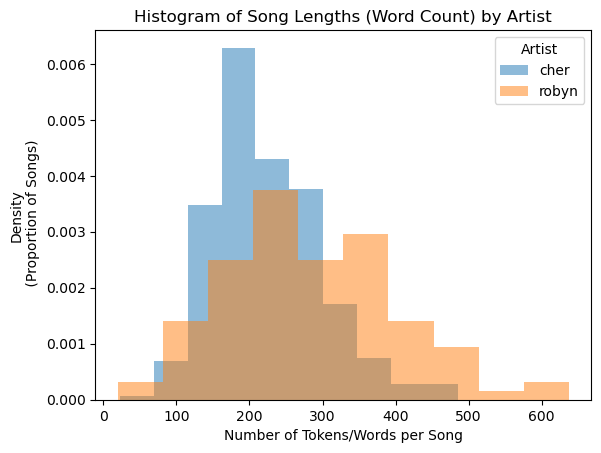

In [70]:
# Your lyric length comparison chart here. 
# Create a df from song_lengths
df_song_lengths = pd.DataFrame(song_lengths)

# Plot histogram 
df_song_lengths.groupby('artist')['length'].plot(kind="hist", density=True, alpha=0.5, legend=True)

# Set plot labels and title
plt.xlabel('Number of Tokens/Words per Song')
plt.ylabel('Density\n (Proportion of Songs)')
plt.title('Histogram of Song Lengths (Word Count) by Artist')
plt.legend(title='Artist')
plt.show()